In [86]:
#Import the DataSet
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns


df = pd.read_csv(r'/content/drive/MyDrive/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 1 - Artificial Neural Networks (ANN)/Section 3 - ANN Intuition/Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#Data Preprocessing
Get the Data in required format to fit in the model

In [88]:
X = df.iloc[:,3:-1]
y = df.iloc[:,-1]


In [89]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [90]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

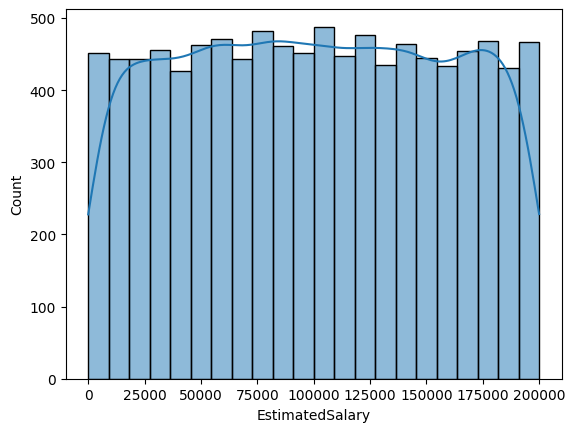

In [91]:
sns.histplot(df["EstimatedSalary"], kde=True)

#Encoding the categorical data

1. Encoding the Gender Column

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:,2] = le.fit_transform(X.iloc[:,2])
X.head()

<ipython-input-92-21ee8014280d>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,2] = le.fit_transform(X.iloc[:,2])


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


2. Encoding the 'Geography' column with OneHotEnocder to avoid Dummy value trap

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [94]:
print(X)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [95]:
type(X)

numpy.ndarray

In [96]:
X[1]

array([0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 6.0800000e+02,
       0.0000000e+00, 4.1000000e+01, 1.0000000e+00, 8.3807860e+04,
       1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1254258e+05])

In [97]:
X= X[:, 1:]

In [98]:
X[1]

array([0.0000000e+00, 1.0000000e+00, 6.0800000e+02, 0.0000000e+00,
       4.1000000e+01, 1.0000000e+00, 8.3807860e+04, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 1.1254258e+05])

# Splitting the Data between training and test data

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [100]:
actual_label = y_test

# Feature scaling

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
#X_test = sc.transform(X_test)

In [103]:
X_train.shape[1]

11

## Building the ANN

# Initializing the ANN

In [124]:
ann = tf.keras.models.Sequential()

# Add the Input Layer and First hidden layer

In [125]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu', input_dim=X_train.shape[1]))

#Add the Second(Hidden) Layer

In [126]:
ann.add(tf.keras.layers.Dense(units=10,activation='relu'))

#Add the droupout

In [127]:
ann.add(tf.keras.layers.Dropout(.3))

## Add the output layer

In [128]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

##Training the ANN

In [129]:
#Compiling the ANN
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [130]:
ann.summary()

Model: "sequential_1005"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3012 (Dense)          (None, 10)                120       
                                                                 
 dense_3013 (Dense)          (None, 10)                110       
                                                                 
 dropout_1005 (Dropout)      (None, 10)                0         
                                                                 
 dense_3014 (Dense)          (None, 1)                 11        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


### Training the ANN on the Training set

In [131]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5829 - accuracy: 0.7322
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4929 - accuracy: 0.7993
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4523 - accuracy: 0.8055
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4372 - accuracy: 0.8119
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4246 - accuracy: 0.8158
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.8163
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8171
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8163
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8232
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3953 - accura

##  Making the predictions and evaluating the model

In [112]:
print(ann.predict(sc.transform([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))>0.5)

1/1 [==============================] - 0s 66ms/step
[[False]]


In [113]:
y_preds = ann.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [114]:
y_preds


array([[0.28267258],
       [0.30463073],
       [0.20422153],
       ...,
       [0.12433987],
       [0.1321507 ],
       [0.2975477 ]], dtype=float32)

In [115]:
y_preds = (y_preds > 0.5)

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(actual_label, y_preds)
print(cm)
accuracy_score(actual_label, y_preds)

[[1531   64]
 [ 212  193]]


0.862

In [117]:
print(classification_report(actual_label, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.48      0.58       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



## Testing with Cross-val Score

In [118]:
!pip install scikeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold

def build_clf():
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=10, activation='relu', input_dim=X_train.shape[1]))
  ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
  ann.add(tf.keras.layers.Dropout(0.3))
  ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return ann
model = KerasClassifier(model=build_clf, batch_size=32, epochs=100, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
accuries = cross_val_score(estimator=ann, X=X_train, y=y_train, cv=kfold, n_jobs=-1, scoring="accuracy")


KeyboardInterrupt: ignored

In [121]:
print(accuries.mean())
print(accuries.std())

0.8590000000000002
0.008905756565278424


##Hyperparamter Tuning with GridSearchCV

## create the object of KerasClassifier class

In [ ]:
'''from sklearn.model_selection import GridSearchCV
def build_clf(unit):
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu', input_dim=X_train.shape[1]))
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(tf.keras.layers.Dropout(0.3))
  ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return ann
model = KerasClassifier(build_fn = build_clf)'''

In [ ]:
#Now we will create the dictionary of the parameters we want to tune and pass as an argument in GridSearchCV. 
"""parameters = {'unit':[5,6,10,11,15],
              'batch_size':[20,25,32,50,100],
              'nb_epoch':[100, 200, 300, 400]}
gd_model = GridSearchCV(estimator=model,
                        param_grid=parameters,
                        cv=10)
gs_model = gd_model.fit(X_train,y_train)"""


In [ ]:
'''best_params=gs_model.best_params_
accuracy=gs_model.best_score_'''


In [ ]:
#print(best_params)
#print(accuracy)

In [132]:
from keras.models import load_model
ann.save("/content/drive/MyDrive/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 1 - Artificial Neural Networks (ANN)/Section 3 - ANN Intuition/network.h5")
